# Data Mining Pipeline: Clustering, Classification, and Association

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.0 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.0 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.0 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.0 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.0 MB 1.2 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/11.0 MB 1.2 MB/s eta 0:00:08
   ---------- ------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#TAHAPAN DALAM DATA MINING
#TAHAP 1 IMPORT DAN PERSIAPAN DATA

#install pustaka dasar pandas, numpy, matplotlib, seaborn dan scikit-learn
#!pip install pandas numpy matplotlib seaborn scikit-learn

#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#baca data set csv
#nama variabel yang digunakan untuk membaca file adalah df
from pathlib import Path

# Use a raw string or forward slashes to avoid accidental escape sequences like '\t'
csv_path = Path(r'C:/data mining/Video_Games_Sales.csv')
# Alternatively you can use:
# csv_path = Path('D:/Data Pekerjaan/Mengajar UIN/Data warehouse dan Mining/tugas dan praktikum/ETL Excel/BMW sales data (2010-2024).csv')

df = pd.read_csv(csv_path)
#sperintah untuk menampilkan isi dataframe/data set hanya bagian atas table
df.head()
#df.info()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

#TAHAP 2 : PEMBERSIHAN DAN SELEKSI FITUR
#untuk melihat informasi struktur data dari dataset yang kita punya
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


np.int64(0)

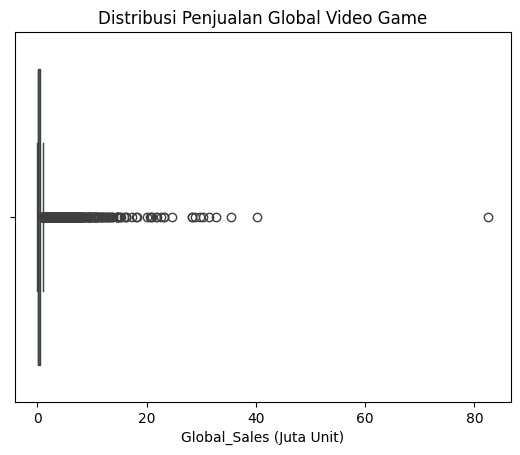

In [ ]:
#Pengecekan data ekstream
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset video game sales
df = pd.read_csv('Video_Games_Sales.csv')

# Pengecekan data ekstrem
# Menampilkan informasi rentang nilai total penjualan global
# dari kolom Global_Sales pada file Video_Games_Sales

sns.boxplot(x=df['Global_Sales'])   # gunakan kolom penjualan global
plt.title('Distribusi Penjualan Global Video Game')  # judul grafik
plt.xlabel('Global_Sales (Juta Unit)')               # label sumbu X
plt.show()  # tampilkan grafik

In [ ]:
#Tahapan modifikasi sebelum normalisasi

import pandas as pd

# Membaca dataset video games sales
df = pd.read_csv('Video_Games_Sales.csv')

# Menghitung total penjualan unit (dalam satuan unit, bukan juta unit)
df['Total_Sales_Unit'] = (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']) * 1_000_000

# Karena tidak ada harga, kita gunakan Global_Sales sebagai estimasi revenue (dalam satuan unit × 1 juta)
df['Total_Revenue'] = df['Global_Sales'] * 1000000

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales_Unit,Total_Revenue
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,82540000.0,82530000.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40240000.0,40240000.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35520000.0,35520000.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,32770000.0,32770000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31380000.0,31370000.0


## Preprocessing & Standardization

In [6]:
import pandas as pd

df = pd.read_csv('Video_Games_Sales.csv')

# Membuat kolom tambahan sesuai tahapan sebelumnya
df['Total_Sales_Unit'] = (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']) * 1000000
df['Total_Revenue'] = df['Global_Sales'] * 1000000

#TAHAP 3: NORMALISASI / STANDARISASI DATA
#Memisahkan data numerik dan data kategorikal

numeric_colm = df.select_dtypes(include=['int64', 'float64']).columns
categorical_colm = df.select_dtypes(include=['object']).columns

print("Kolom Numerik:", numeric_colm)
print("Kolom Kategori:", categorical_colm)

Kolom Numerik: Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count',
       'Total_Sales_Unit', 'Total_Revenue'],
      dtype='object')
Kolom Kategori: Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer',
       'Rating'],
      dtype='object')


In [9]:
#melakukan standarisasi format data numerik
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# LOAD DATA
df = pd.read_csv('Video_Games_Sales.csv')

#buat object scaler numbering
scaler = StandardScaler()
encoder = LabelEncoder()

df_scaler = df.copy()

# ====== numeric ======
numeric_coln = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

df_scaler[numeric_coln] = scaler.fit_transform(df[numeric_coln])
print('hasil konversi scala numerik')
print(df_scaler.head())

# ====== categorical ======
categorical_colm = ['Name','Platform','Year_of_Release','Genre','Publisher']

print('\nhasil konversi scala kategorikal')
for col in categorical_colm:
    df_scaler[col] = encoder.fit_transform(df[col])

print(df_scaler.head())

hasil konversi scala numerik
    Name  Platform  Year_of_Release  Genre  Publisher   NA_Sales   EU_Sales  \
0  11075        26        -0.082900     10        361  50.518992  57.255699   
1   9389        11        -3.655048      4        361  35.423530   6.825337   
2   5613        26         0.257304      6        361  18.951283  25.066106   
3  11077        26         0.427407     10        361  18.865234  21.429874   
4   7392         5        -1.783923      7        361  13.530193  17.376370   

    JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0  11.956905    45.005218     52.973092      0.504568      1.298211   
1  21.801182     3.870656     25.652008           NaN           NaN   
2  12.021669    17.367934     22.602694      0.935067      2.457367   
3  10.370162    15.546873     20.826080      0.791568      2.457367   
4  32.843612     5.102551     19.921623           NaN           NaN   

   User_Score  User_Count  Developer  Rating  Total_Sales_Unit  Total

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. BACA DATASET
df = pd.read_csv('Video_Games_Sales.csv')

# 2. PILIH KOLOM NUMERIK
num_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

# 3. SCALING
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# 4. LIHAT HASIL
df_scaled.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales_Unit,Total_Revenue
0,11075,26,-0.082900,10,361,50.518992,57.255699,11.956905,45.005218,52.973092,0.504568,1.298211,77,0.284671,1020,1,52.974331,52.973092
1,9389,11,-3.655048,4,361,35.423530,6.825337,21.801182,3.870656,25.652008,NaN,NaN,96,NaN,1696,8,25.649565,25.652008
2,5613,26,0.257304,6,361,18.951283,25.066106,12.021669,17.367934,22.602694,0.935067,2.457367,80,0.974209,1020,1,22.600560,22.602694
3,11077,26,0.427407,10,361,18.865234,21.429874,10.370162,15.546873,20.826080,0.791568,2.457367,77,0.053043,1020,1,20.824127,20.826080
4,7392,5,-1.783923,7,361,13.530193,17.376370,32.843612,5.102551,19.921623,NaN,NaN,96,NaN,1696,8,19.926221,19.921623


## K-Means Clustering

In [15]:
#TAHAP 4 CLUSTERISASI (K-MEANS)
#import data standarisasi untuk masuk ke kmeans
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)
features = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df.head()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Total_Sales_Unit', 'Total_Revenue'],
      dtype='object')


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales_Unit,Total_Revenue
0,11075,26,-0.082900,10,361,50.518992,57.255699,11.956905,45.005218,52.973092,0.504568,1.298211,77,0.284671,1020,1,52.974331,52.973092
1,9389,11,-3.655048,4,361,35.423530,6.825337,21.801182,3.870656,25.652008,NaN,NaN,96,NaN,1696,8,25.649565,25.652008
2,5613,26,0.257304,6,361,18.951283,25.066106,12.021669,17.367934,22.602694,0.935067,2.457367,80,0.974209,1020,1,22.600560,22.602694
3,11077,26,0.427407,10,361,18.865234,21.429874,10.370162,15.546873,20.826080,0.791568,2.457367,77,0.053043,1020,1,20.824127,20.826080
4,7392,5,-1.783923,7,361,13.530193,17.376370,32.843612,5.102551,19.921623,NaN,NaN,96,NaN,1696,8,19.926221,19.921623


In [ ]:

from sklearn.cluster import KMeans

features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
X = df[features]

kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(X)
df['Cluster'] = kmeans.predict(X)
#visualisasi hasil clustering
plt.figure(figsize=(10, 6))
#menambahkan label cluster ke dalam dataframe
df['Cluster'] = kmeans.labels_
#melihat jumlah data per cluster
print(df['Cluster'].value_counts())
df.head()

Cluster
2    16108
0      577
1       34
Name: count, dtype: int64


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales_Unit,Total_Revenue,Cluster
0,11075,26,-0.082900,10,361,50.518992,57.255699,11.956905,45.005218,52.973092,0.504568,1.298211,77,0.284671,1020,1,52.974331,52.973092,1
1,9389,11,-3.655048,4,361,35.423530,6.825337,21.801182,3.870656,25.652008,NaN,NaN,96,NaN,1696,8,25.649565,25.652008,1
2,5613,26,0.257304,6,361,18.951283,25.066106,12.021669,17.367934,22.602694,0.935067,2.457367,80,0.974209,1020,1,22.600560,22.602694,1
3,11077,26,0.427407,10,361,18.865234,21.429874,10.370162,15.546873,20.826080,0.791568,2.457367,77,0.053043,1020,1,20.824127,20.826080,1
4,7392,5,-1.783923,7,361,13.530193,17.376370,32.843612,5.102551,19.921623,NaN,NaN,96,NaN,1696,8,19.926221,19.921623,1


<Figure size 1000x600 with 0 Axes>

In [19]:
#tujuannya membantu kita tahu apakah data seimbang (balanced) antara kategori 0 dan 1.
import pandas as pd

df = pd.read_csv('Video_Games_Sales.csv')

#melakukan Explanatory Data Analysis (EDA) untuk : 
#- memahami distribusi setiap variabel
#- menemukan pola korelasi antar fitur
#- memastikan tidak ada noise yang belum diselesaikan
#- menentukan fitur mana yang relevan untuk di cluster

#melihat statistik deskirptif
df.describe()

#cek distribusi kelas (pakai kolom "Rating" karena itu kategori)
df['Rating'].value_counts()

Rating
8    6769
1    3991
7    2961
5    1563
2    1420
3       8
4       3
6       3
0       1
Name: count, dtype: int64

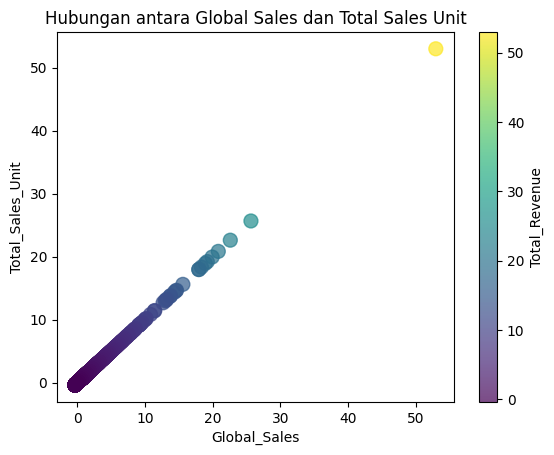

In [20]:
#visualisasi hubungan antar variabel. misalnya mengetahui hubungan antara Global Sales dan Total Sales Unit terhadap total revenue
import matplotlib.pyplot as plt

plt.scatter(df['Global_Sales'], df['Total_Sales_Unit'], 
            c=df['Total_Revenue'], cmap='viridis', alpha=0.7, s=100)

plt.colorbar(label='Total_Revenue')
plt.xlabel('Global_Sales')
plt.ylabel('Total_Sales_Unit')
plt.title('Hubungan antara Global Sales dan Total Sales Unit')
plt.show()

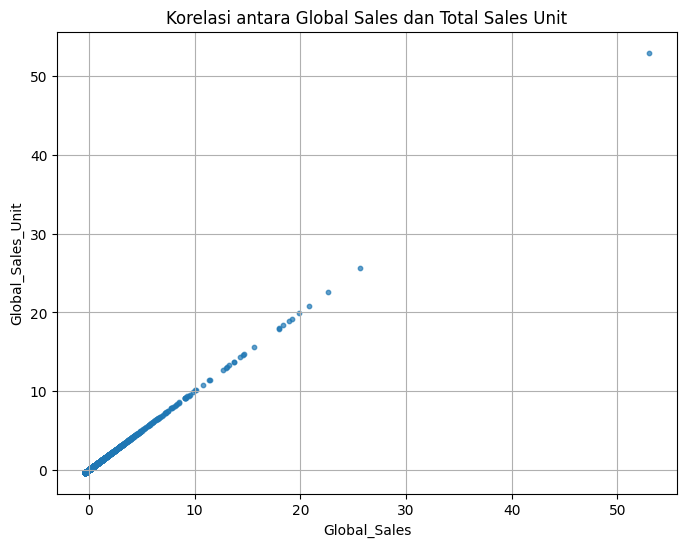

In [24]:
import matplotlib.pyplot as plt

# Asumsi bahwa DataFrame Anda masih bernama 'pf'
plt.figure(figsize=(8, 6))

# Membuat scatter plot hanya dengan Global_Sales di X dan Total_Sales_Unit di Y
#melihat sebaran acak antara price usd dan sales volum
plt.scatter(df['Global_Sales'], df['Total_Sales_Unit'], alpha=0.7, s=10)

plt.xlabel('Global_Sales')
plt.ylabel('Global_Sales_Unit')
plt.title('Korelasi antara Global Sales dan Total Sales Unit')
plt.grid(True)
plt.show()

Text(0.5, 0.98, 'Distribusi Setiap Variabel Numerik Terstandarisasi')

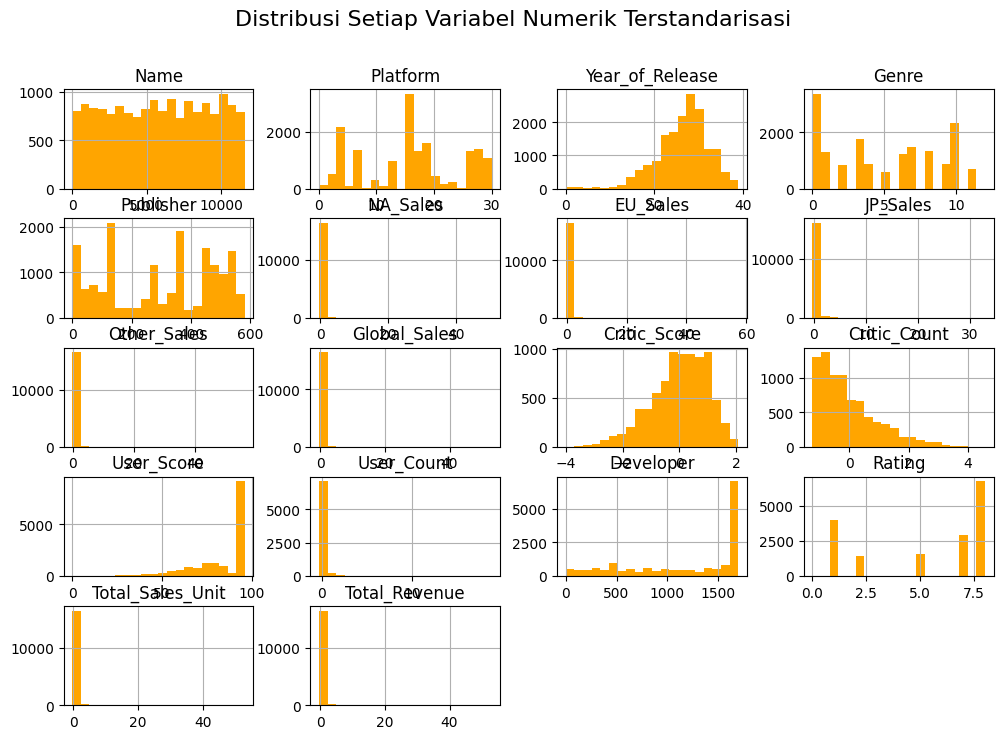

In [25]:
#analisis distribusi variabel
import matplotlib.pyplot as plt
import seaborn as sns

#visualisasi distribusi semua kolom numerik
df_scaler.hist(figsize=(12,8), bins=20, color='orange')
plt.suptitle('Distribusi Setiap Variabel Numerik Terstandarisasi', fontsize=16)
#plt.xlabel('Nilai', fontsize=14)
#plt.ylabel('Frekuensi', fontsize=14
#plt.show()

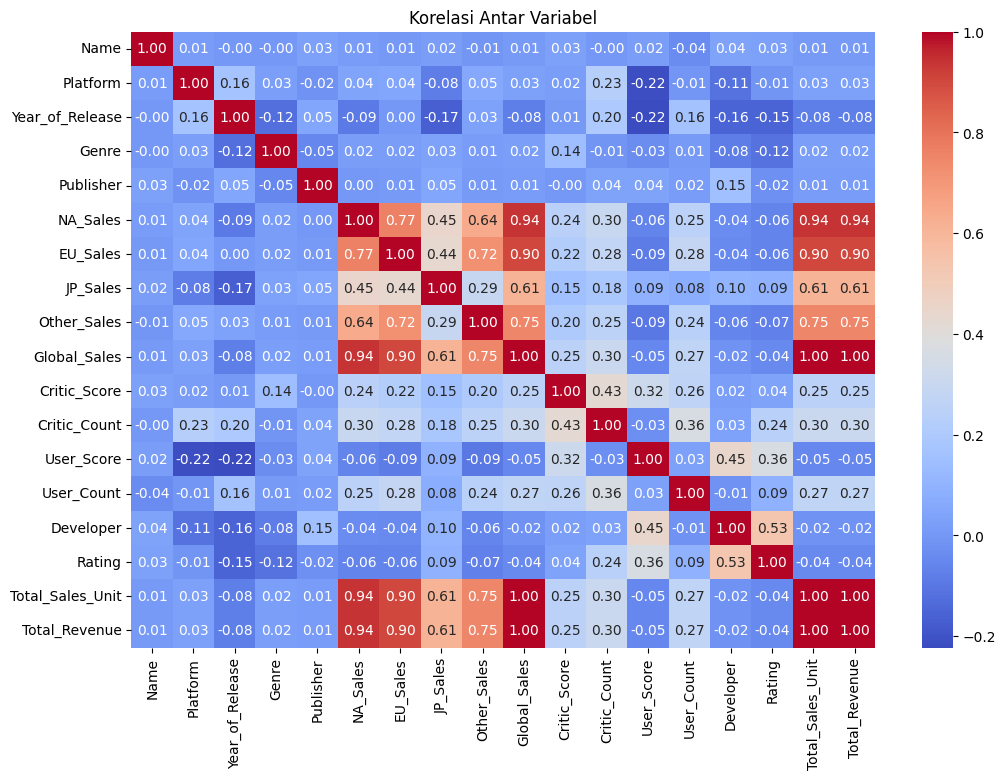

In [ ]:
#Analisa korelasi antar variabel
#untuk melihat hubungan antar fitur

plt.figure(figsize=(12,8))
sns.heatmap(df_scaler.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

## Visualisasi Cluster (2D)

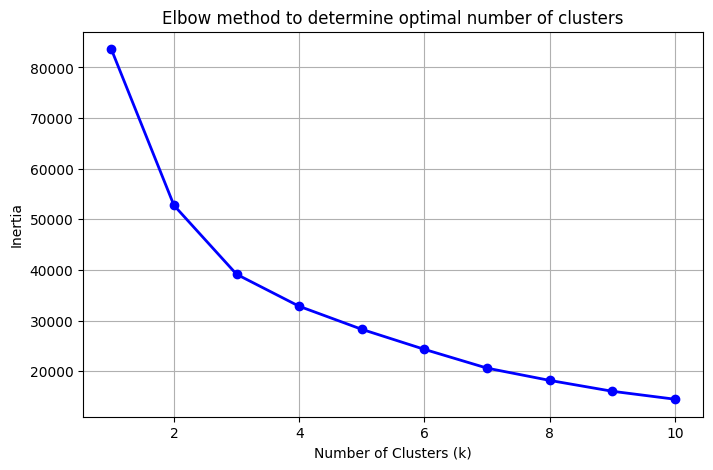

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-', linewidth=2)
plt.title('Elbow method to determine optimal number of clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

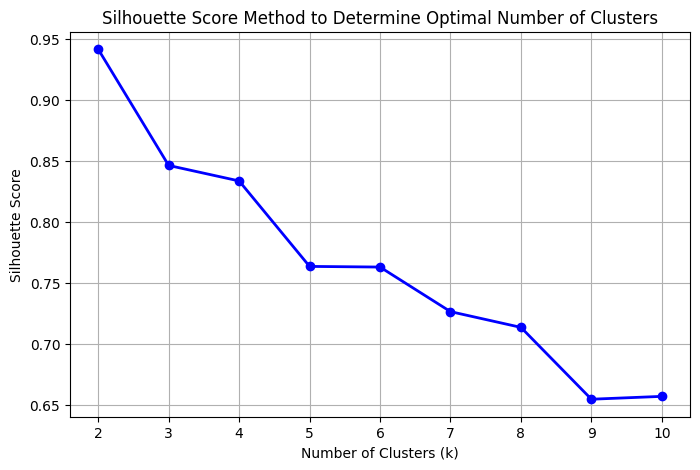

In [28]:
from sklearn.metrics  import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-', linewidth=2)
plt.title('Silhouette Score Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

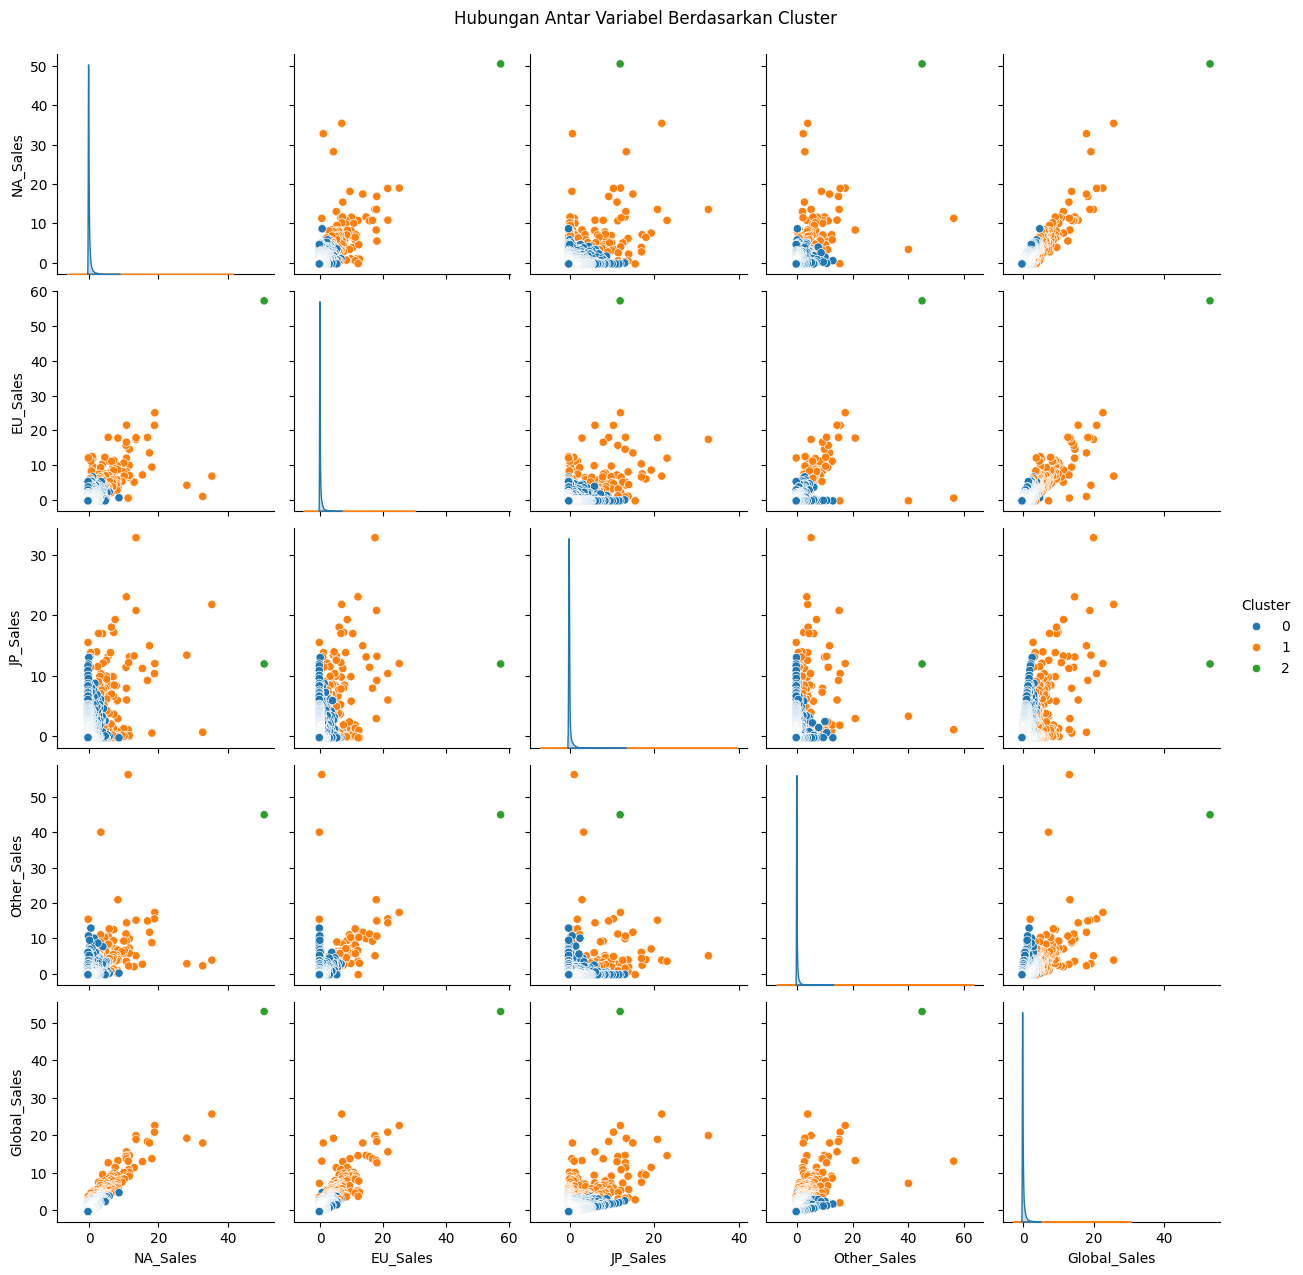

In [ ]:
# TAHAP 5 VISUALISASI CLUSTER
# #visualisasi perbedaan antar cluster

# Perbaikan: tambahkan ini dulu
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

#Tidak diubah strukturnya
sns.pairplot(df, vars=features, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle("Hubungan Antar Variabel Berdasarkan Cluster", y=1.02)
plt.show()

#Cluster 0: game berpenjualan rendah
#Cluster 1: game berpenjualan sedang
#Cluster 2: hanya beberapa game blockbuster (outlier)

#cluster 0 → titik biru di kiri bawah
#cluster 1 → sebaran menengah
#cluster 2 → hanya titik tunggal jauh di atas

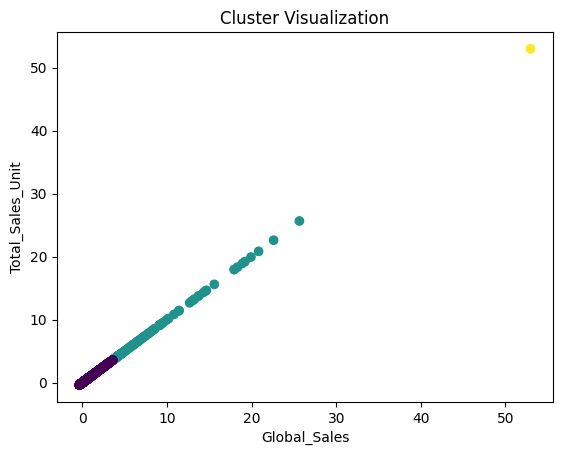

In [32]:
# 1. IMPORT LIBRARY
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2. SCALING
num_cols = ['Global_Sales','Total_Sales_Unit']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# 3. KMEANS
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled[num_cols])

# 4. MASUKKAN CLUSTER KE df_scaled
df_scaled['Cluster'] = kmeans.labels_

# 5. VISUALISASI CLUSTER
plt.scatter(df_scaled['Global_Sales'], 
            df_scaled['Total_Sales_Unit'],
            c=df_scaled['Cluster'])

plt.xlabel('Global_Sales')
plt.ylabel('Total_Sales_Unit')
plt.title('Cluster Visualization')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5200\3950935082.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_5200\3950935082.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_5200\3950935082.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_5200\3950935082.py:17: FutureWarn

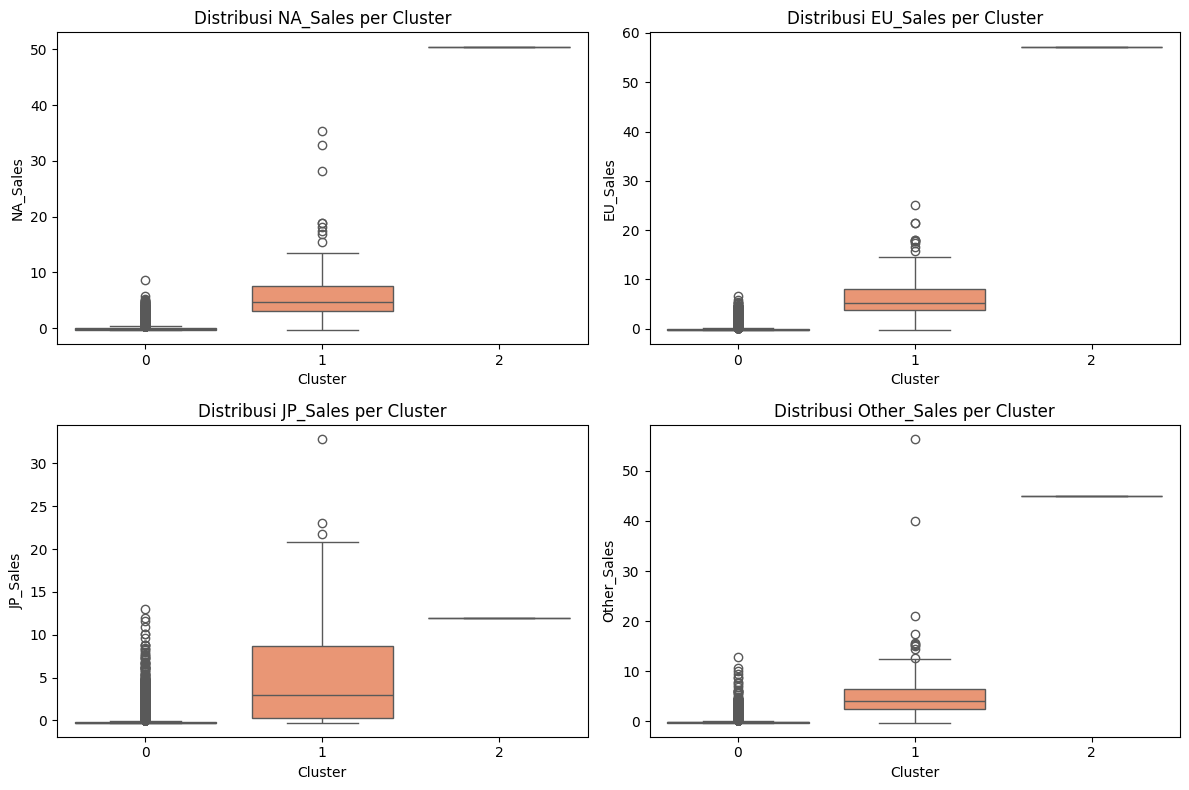

In [34]:
#Boxplot — Perbandingan distribusi tiap fitur antar cluster
import matplotlib.pyplot as plt
import seaborn as sns
import math

# fitur numerik kamu
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# hitung jumlah baris & kolom subplot otomatis
n_cols = 2
n_rows = math.ceil(len(features) / n_cols)

plt.figure(figsize=(12, 8))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
    plt.title(f'Distribusi {col} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Analisis Centroid

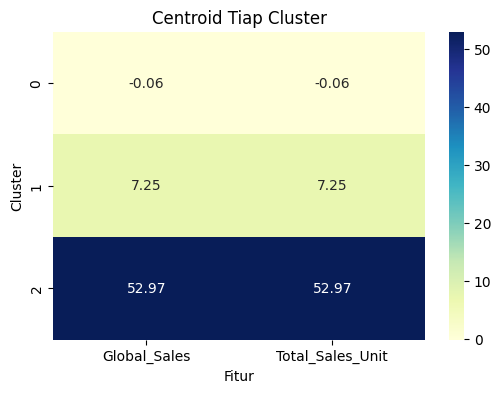

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(centroid, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Centroid Tiap Cluster")
plt.xlabel("Fitur")
plt.ylabel("Cluster")
plt.show()

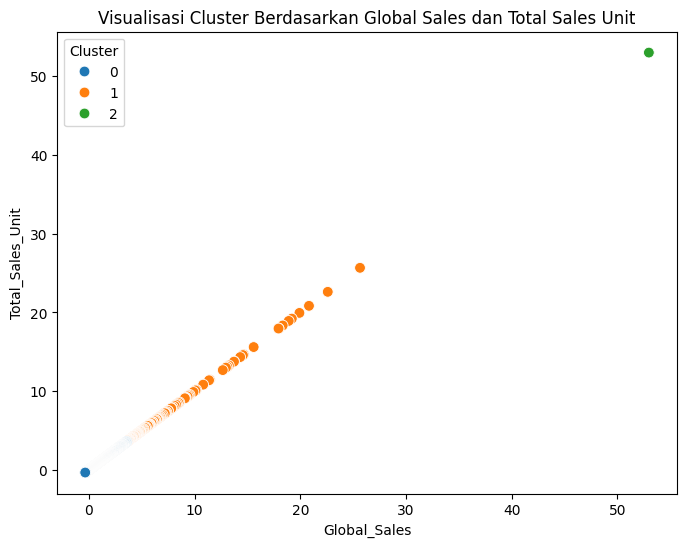

In [6]:
#Scatter Plot 2D (untuk visualisasi sederhana)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Global_Sales', y='Total_Sales_Unit',
    hue='Cluster', palette='tab10', data=df, s=60
)
plt.title("Visualisasi Cluster Berdasarkan Global Sales dan Total Sales Unit")
plt.show()

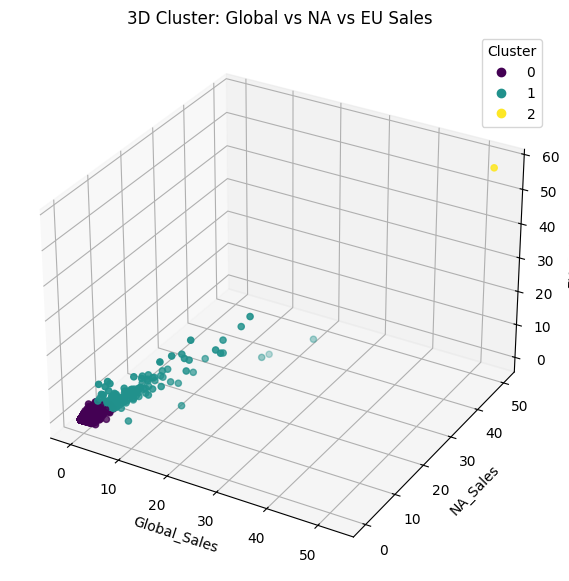

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('Video_Games_Sales.csv')

# Pilih fitur untuk clustering
features = ['Global_Sales', 'NA_Sales', 'EU_Sales']
X = df[features].fillna(0)

# Buat model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Global_Sales'],
                df['NA_Sales'],
                df['EU_Sales'],
                c=df['Cluster'])

# Label sumbu
ax.set_xlabel('Global_Sales')
ax.set_ylabel('NA_Sales')
ax.set_zlabel('EU_Sales')

# Judul plot
plt.title('3D Cluster: Global vs NA vs EU Sales')

# Legend Cluster
plt.legend(*sc.legend_elements(), title='Cluster')

# Tampilkan plot
plt.show()


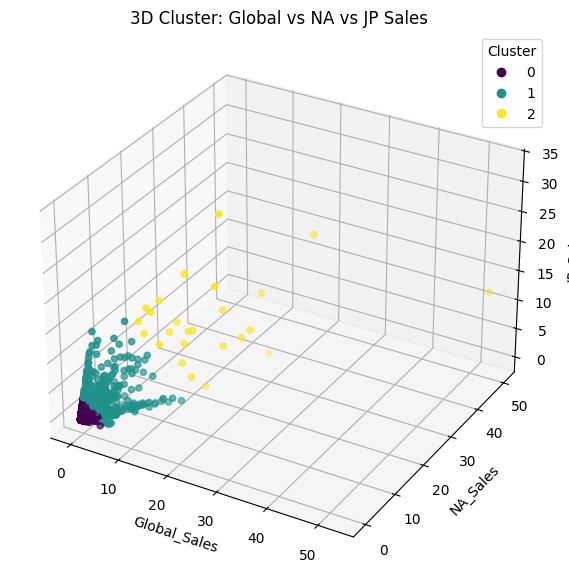

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('Video_Games_Sales.csv')

# pilih 3 fitur berbeda
features = ['Global_Sales', 'NA_Sales', 'JP_Sales']
X = df[features].fillna(0)

# Model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Global_Sales'],
                df['NA_Sales'],
                df['JP_Sales'],
                c=df['Cluster'])

# Label sumbu
ax.set_xlabel('Global_Sales')
ax.set_ylabel('NA_Sales')
ax.set_zlabel('JP_Sales')

# Judul plot
plt.title('3D Cluster: Global vs NA vs JP Sales')

# Legend cluster
plt.legend(*sc.legend_elements(), title='Cluster')

plt.show()--

   Cluster  Jumlah
0        0   16245
1        1     449
2        2      25
{np.int64(0): np.int32(0), np.int64(1): np.int32(1), np.int64(2): np.int32(2)}
Profil Rata-rata Tiap Cluster:
         Global_Sales   NA_Sales   EU_Sales   JP_Sales
Cluster                                               
0           -0.107125  -0.094077  -0.087987  -0.100823
1            2.944479   2.523635   2.405319   2.878628
2           16.727078  15.806805  13.974605  13.814364


C:\Users\USER\AppData\Local\Temp\ipykernel_16748\3156563349.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='rainbow')


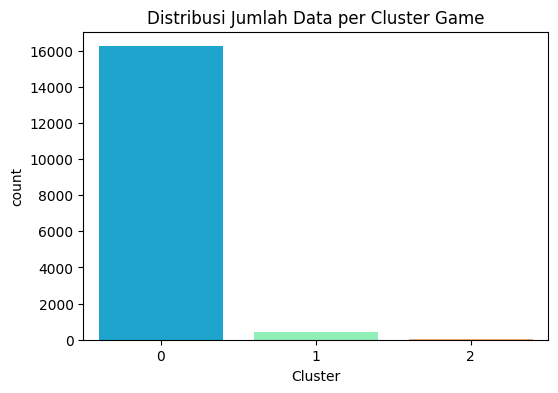

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Video_Games_Sales.csv')

# ====== Tambahan ini harus ada ======
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Global_Sales','NA_Sales','JP_Sales']])
# ====================================

# Menghitung jumlah data tiap cluster
model_per_cluster = df.groupby(['Cluster'])['Name'].count().reset_index(name='Jumlah')

model_per_cluster = model_per_cluster.sort_values(['Cluster','Jumlah'],
                                                  ascending=[True, False])
print(model_per_cluster)

encoder = LabelEncoder()
model_mapping = dict(zip(encoder.fit_transform(model_per_cluster['Cluster']),
                         encoder.classes_))

print(model_mapping)

cluster_profile = df.groupby('Cluster')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']].mean()
print("Profil Rata-rata Tiap Cluster:")
print(cluster_profile)

plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette='rainbow')
plt.title('Distribusi Jumlah Data per Cluster Game')
plt.show()

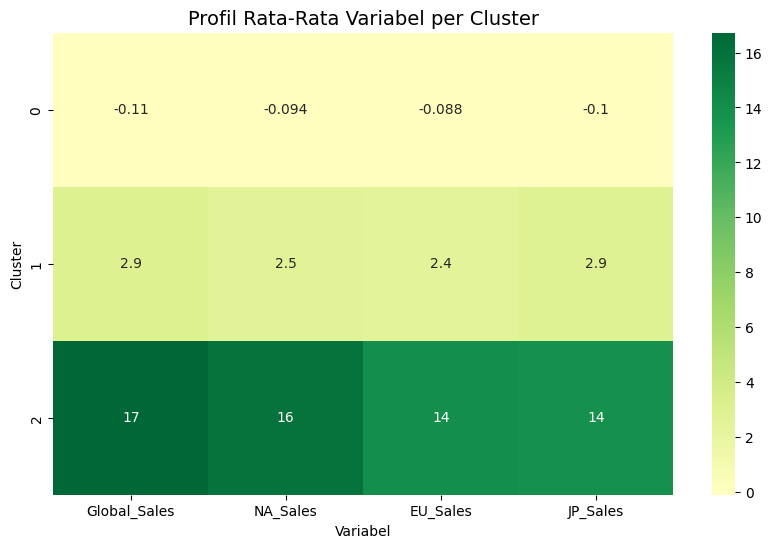

In [12]:
#visualisasi profil dari tiap-tiap cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap="RdYlGn", center=0)
plt.title("Profil Rata-Rata Variabel per Cluster", fontsize=14)
plt.xlabel("Variabel")
plt.ylabel("Cluster")
plt.show()

In [13]:
# TAHAP 6 Validasi dan Evaluasi Kualitas Cluster
from sklearn.metrics import silhouette_score

# --- Gunakan fitur sesuai dataset ---
X_features = df[['Global_Sales',
                 'NA_Sales',
                 'EU_Sales',
                 'JP_Sales']]

# Hitung Silhouette Score
score = silhouette_score(X_features, df['Cluster'])

print("Silhouette Score:", score)

Silhouette Score: 0.8604814919101302


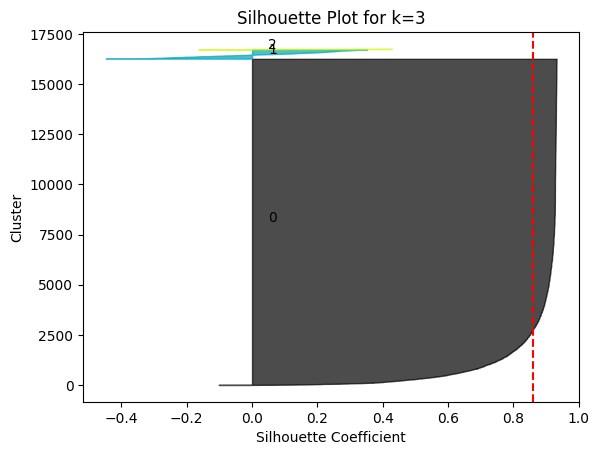

In [14]:
#visualisasi data Silhouete
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

sample_silhouette_values = silhouette_samples(X_features, df['Cluster'])

y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot for k=3")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")

plt.axvline(x=score, color="red", linestyle="--")
plt.show()

## Membuat Label Gabungan

In [17]:
# Membuat Label Gabungan

cluster_labels = {
    0: 'Penjualan Rendah, Pasar Stabil, Genre Umum',
    1: 'Penjualan Menengah, Genre Populer di Jepang & Eropa',
    2: 'Penjualan Tinggi, Platform Global dan Best-Seller'
}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales_Unit,Total_Revenue,Cluster,Cluster_Label,Combined_Label
0,11075,26,-0.082900,10,361,50.518992,57.255699,11.956905,45.005218,52.973092,...,1.298211,77,0.284671,1020,1,52.974331,52.973092,2,"Penjualan Tinggi, Platform Global dan Best-Seller",2_High
1,9389,11,-3.655048,4,361,35.423530,6.825337,21.801182,3.870656,25.652008,...,NaN,96,NaN,1696,8,25.649565,25.652008,2,"Penjualan Tinggi, Platform Global dan Best-Seller",2_High
2,5613,26,0.257304,6,361,18.951283,25.066106,12.021669,17.367934,22.602694,...,2.457367,80,0.974209,1020,1,22.600560,22.602694,2,"Penjualan Tinggi, Platform Global dan Best-Seller",2_High
3,11077,26,0.427407,10,361,18.865234,21.429874,10.370162,15.546873,20.826080,...,2.457367,77,0.053043,1020,1,20.824127,20.826080,2,"Penjualan Tinggi, Platform Global dan Best-Seller",2_High
4,7392,5,-1.783923,7,361,13.530193,17.376370,32.843612,5.102551,19.921623,...,NaN,96,NaN,1696,8,19.926221,19.921623,2,"Penjualan Tinggi, Platform Global dan Best-Seller",2_High


In [18]:
df['Combined_Label'] = (
    df['Cluster'].astype(str) + '_' + 
    pd.qcut(df['Global_Sales'], 3, labels=['Low','Medium','High']).astype(str)
)

df[['Name','Global_Sales','Cluster','Combined_Label']].head()

,Name,Global_Sales,Cluster,Combined_Label
0,11075,52.973092,2,2_High
1,9389,25.652008,2,2_High
2,5613,22.602694,2,2_High
3,11077,20.826080,2,2_High
4,7392,19.921623,2,2_High


In [19]:
for c in df['Cluster'].unique():
    print(f'\n--- Cluster {c} correlation matrix ---')
    display(df[df['Cluster']==c][['NA_Sales','EU_Sales','JP_Sales','Global_Sales']].corr())


--- Cluster 2 correlation matrix ---


,NA_Sales,EU_Sales,JP_Sales,Global_Sales
NA_Sales,1.000000,0.457702,-0.193468,0.869200
EU_Sales,0.457702,1.000000,-0.019767,0.819430
JP_Sales,-0.193468,-0.019767,1.000000,0.003286
Global_Sales,0.869200,0.819430,0.003286,1.000000



--- Cluster 1 correlation matrix ---


,NA_Sales,EU_Sales,JP_Sales,Global_Sales
NA_Sales,1.000000,0.584970,-0.297503,0.852662
EU_Sales,0.584970,1.000000,-0.211922,0.811367
JP_Sales,-0.297503,-0.211922,1.000000,0.000181
Global_Sales,0.852662,0.811367,0.000181,1.000000



--- Cluster 0 correlation matrix ---


,NA_Sales,EU_Sales,JP_Sales,Global_Sales
NA_Sales,1.000000,0.569315,-0.026876,0.878269
EU_Sales,0.569315,1.000000,0.003343,0.832552
JP_Sales,-0.026876,0.003343,1.000000,0.211869
Global_Sales,0.878269,0.832552,0.211869,1.000000


## Decision Tree Classification

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_scaled[features]
y = df_scaled['Combined_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      0_High       0.00      0.00      0.00         1
      1_High       0.72      0.46      0.56       283
       1_Low       0.52      0.78      0.62       225
    1_Medium       0.53      0.74      0.62       288
      2_High       0.00      0.00      0.00       118
       2_Low       0.00      0.00      0.00        69
    2_Medium       0.00      0.00      0.00       111
      3_High       0.00      0.00      0.00         1
      4_High       0.00      0.00      0.00         1
      5_High       0.51      0.59      0.55       151
       5_Low       0.45      0.31      0.37        67
    5_Medium       0.00      0.00      0.00       109
      7_High       0.35      0.69      0.46       209
       7_Low       0.41      0.37      0.39       166
    7_Medium       0.35      0.53      0.42       205
      8_High       1.00      0.99      0.99       356
       8_Low       0.98      0.97      0.97       602
    8_Medium       0.99    

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [33]:
# Tahap 7 : Klasifikasi Berdasarkan Global_Sales

import pandas as pd

# Menghitung batas kuartil
q1 = df['Global_Sales'].quantile(0.33)
q3 = df['Global_Sales'].quantile(0.66)

# Fungsi kategorisasi
def kategori_penjualan(x):
    if x < q1:
        return 'Low'
    elif x < q3:
        return 'Medium'
    else:
        return 'High'

# Menambahkan kolom kategori
df['Sales_Category'] = df['Global_Sales'].apply(kategori_penjualan)

# Cek hasil
print(df[['Global_Sales','Sales_Category']].head(10))

   Global_Sales Sales_Category
0     52.973092           High
1     25.652008           High
2     22.602694           High
3     20.826080           High
4     19.921623           High
5     19.204517           High
6     18.907338           High
7     18.338822           High
8     17.951197           High
9     17.944737           High


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# pilih kolom untuk clustering
num_cols = ['Global_Sales']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# jalankan KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled[num_cols])

print(df[['Global_Sales','Cluster']].head())

   Global_Sales  Cluster
0     52.973092        2
1     25.652008        1
2     22.602694        1
3     20.826080        1
4     19.921623        1


In [48]:
# Tahap 7.2 : Label Berdasarkan Cluster Hasil K-Means

from sklearn.cluster import KMeans

# Jalankan KMeans 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Global_Sales']])

# Hitung rata-rata sales per cluster
cluster_sales = df.groupby('Cluster')['Global_Sales'].mean().sort_values()

# Mapping cluster → kategori
mapping_cluster = {}
labels = ['Low', 'Medium', 'High']  # hanya 3 kategori

for i, cluster_id in enumerate(cluster_sales.index):
    mapping_cluster[cluster_id] = labels[i]

# Tambahkan kategori cluster
df['Cluster_Category'] = df['Cluster'].map(mapping_cluster)

# Cek hasil
print(df[['Cluster', 'Cluster_Category', 'Global_Sales']].head(10))

   Cluster Cluster_Category  Global_Sales
0        2             High     52.973092
1        1           Medium     25.652008
2        1           Medium     22.602694
3        1           Medium     20.826080
4        1           Medium     19.921623
5        1           Medium     19.204517
6        1           Medium     18.907338
7        1           Medium     18.338822
8        1           Medium     17.951197
9        1           Medium     17.944737


C:\Users\USER\AppData\Local\Temp\ipykernel_16748\1976714831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Combined_Label', data=df_scaled, palette='viridis')


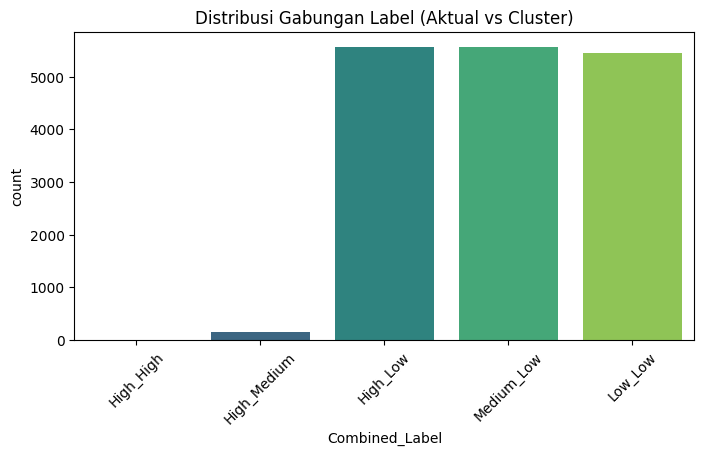

In [59]:
plt.figure(figsize=(8,4))
sns.countplot(x='Combined_Label', data=df_scaled, palette='viridis')
plt.title("Distribusi Gabungan Label (Aktual vs Cluster)")
plt.xticks(rotation=45)
plt.show()

In [11]:
#TAHAP 8.1 Persiapan data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("Video_Games_Sales.csv")

# fitur untuk clustering versi dataset kamu
features_for_clustering = [
    'Total_Sales_Unit',
    'Total_Revenue',
    'Global_Sales',
    'User_Score'
]

X = df[features_for_clustering]

# normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# CLUSTERING (3 cluster sesuai permintaan)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Sales category berdasarkan Total_Sales_Unit
df['Sales_Category'] = pd.qcut(df['Total_Sales_Unit'],
                               q=3,
                               labels=['Low','Medium','High'])

# Cluster category berdasarkan cluster hasil KMeans
df['Cluster_Category'] = df['Cluster'].map({
    0: 'Low',
    1: 'Medium',
    2: 'High'
})

# Combined_Label sama format contoh kamu
df['Combined_Label'] = (
    df['Cluster'].astype(str) + "_" + df['Sales_Category'].astype(str)
)

# print seperti contoh
print(df.head())
print(df.columns)

    Name  Platform  Year_of_Release  Genre  Publisher   NA_Sales   EU_Sales  \
0  11075        26        -0.082900     10        361  50.518992  57.255699   
1   9389        11        -3.655048      4        361  35.423530   6.825337   
2   5613        26         0.257304      6        361  18.951283  25.066106   
3  11077        26         0.427407     10        361  18.865234  21.429874   
4   7392         5        -1.783923      7        361  13.530193  17.376370   

    JP_Sales  Other_Sales  Global_Sales  ...  User_Score  User_Count  \
0  11.956905    45.005218     52.973092  ...          77    0.284671   
1  21.801182     3.870656     25.652008  ...          96         NaN   
2  12.021669    17.367934     22.602694  ...          80    0.974209   
3  10.370162    15.546873     20.826080  ...          77    0.053043   
4  32.843612     5.102551     19.921623  ...          96         NaN   

   Developer  Rating  Total_Sales_Unit  Total_Revenue  Cluster  \
0       1020       1      

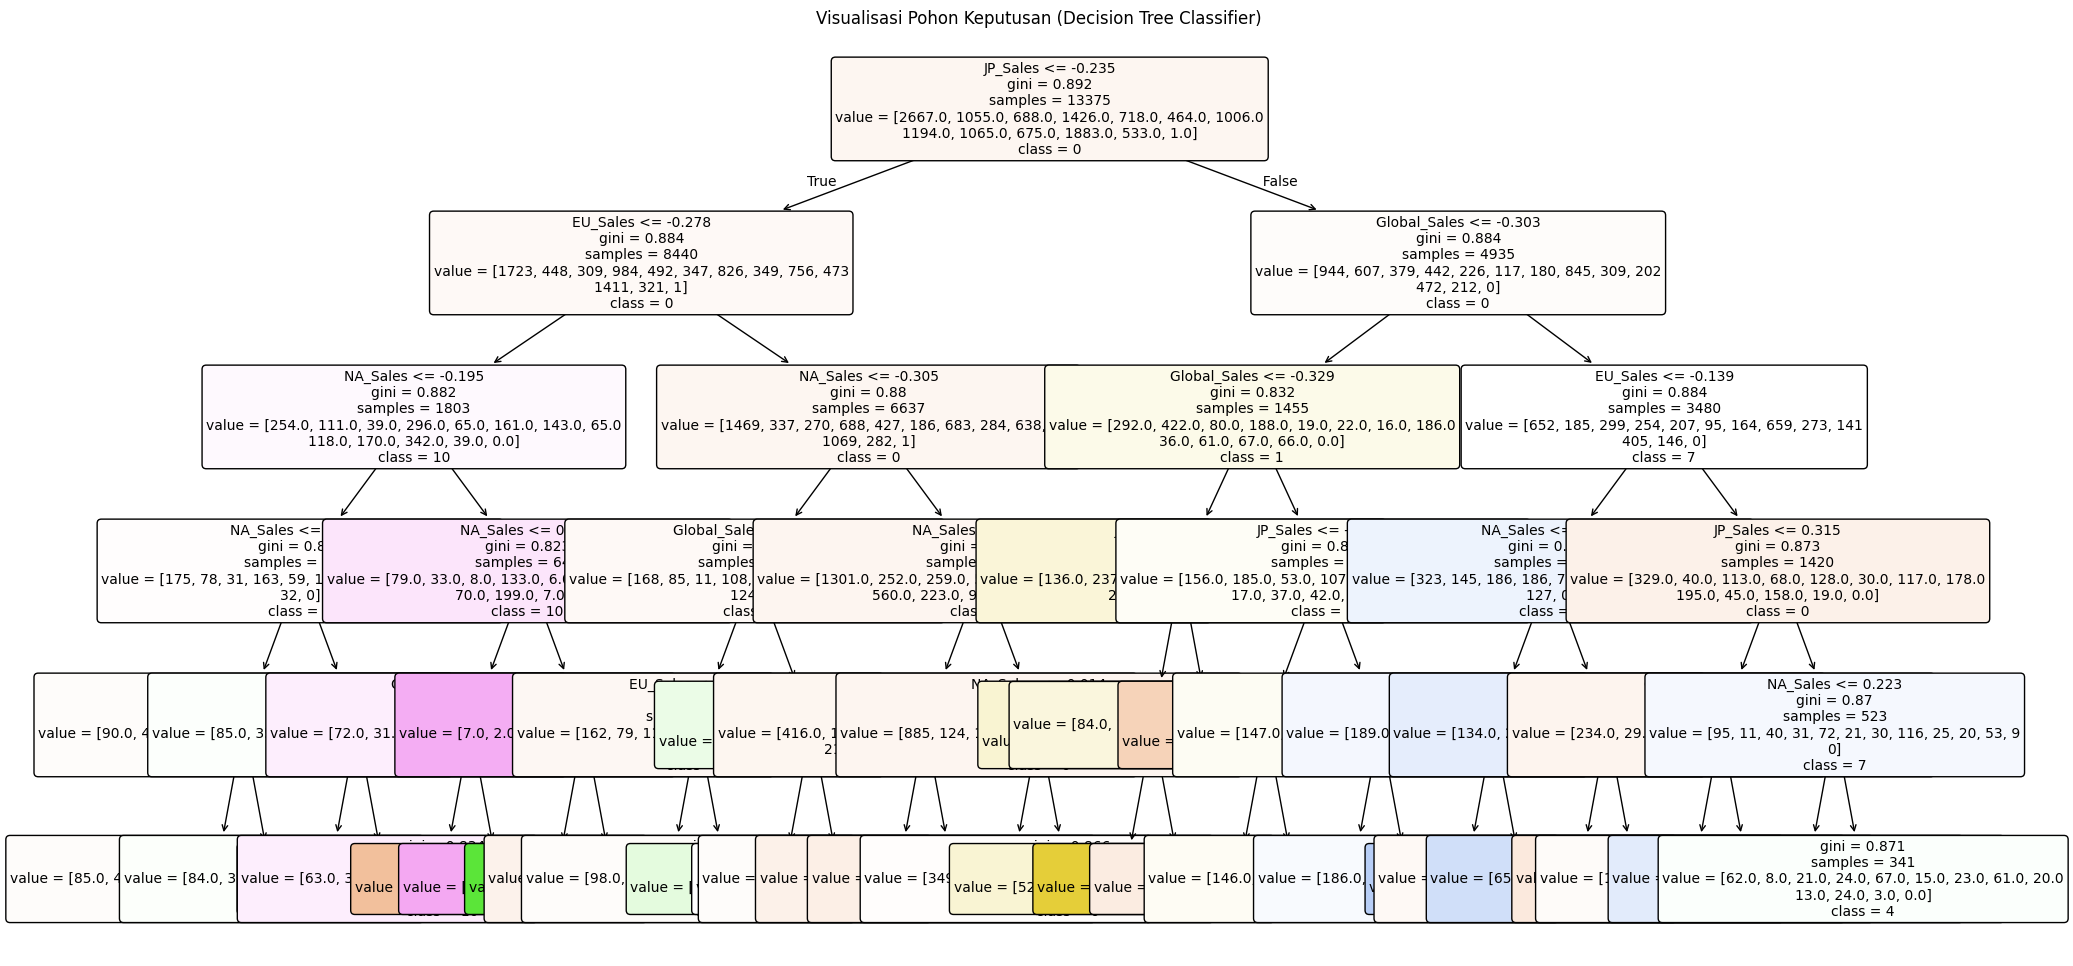

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv("Video_Games_Sales.csv")

features_for_classification = [
    'Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'
]

df = df.dropna(subset=features_for_classification + ['Genre'])

X = df[features_for_classification]
y = df['Genre']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(22,12))
plot_tree(
    clf,
    feature_names=features_for_classification,
    class_names=[str(c) for c in clf.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan (Decision Tree Classifier)")
plt.show()

In [11]:
#TAHAP 8.2. Melatih model Decision Tree
# --- Model Decision Tree ---
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.24      0.68      0.35       703
           1       0.29      0.40      0.33       248
           2       0.00      0.00      0.00       161
           3       0.19      0.10      0.13       324
           4       0.00      0.00      0.00       170
           5       0.00      0.00      0.00       116
           6       0.00      0.00      0.00       243
           7       0.21      0.48      0.29       306
           8       0.00      0.00      0.00       258
           9       0.00      0.00      0.00       199
          10       0.20      0.06      0.10       465
          11       0.00      0.00      0.00       150
          12       0.00      0.00      0.00         1

    accuracy                           0.23      3344
   macro avg       0.09      0.13      0.09      3344
weighted avg       0.14      0.23      0.15      3344



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

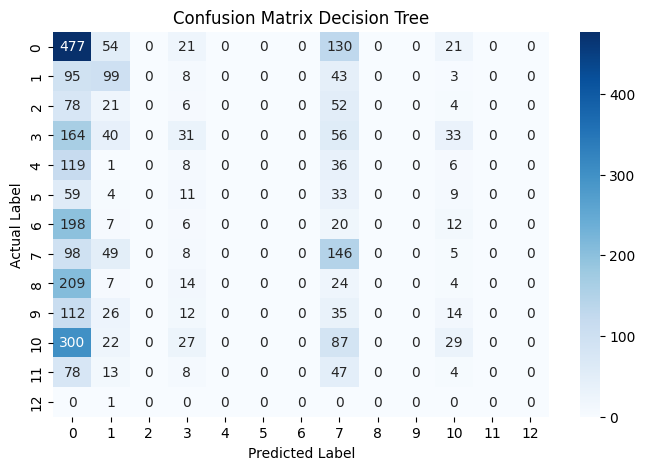

In [16]:
#TAHAB 8.3. Evaluasi model
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi
y_pred = clf.predict(X_test)

# Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

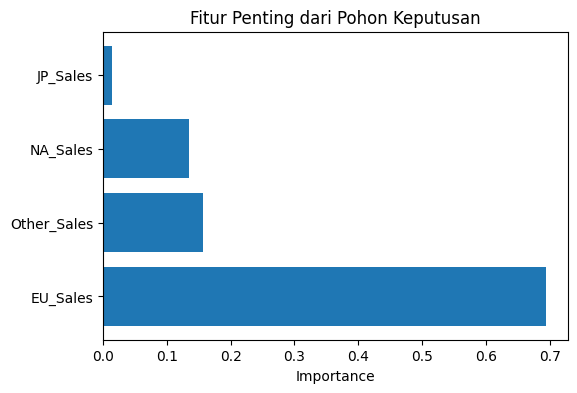

In [ ]:
#TAHAP 8.4 Visualisasi Feature Importance
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# LOAD DATASET
df = pd.read_csv("Video_Games_Sales.csv")

# Buang data null
df = df.dropna()

# Pilih fitur numerik
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
target = 'Global_Sales'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Training model
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)


# FEATURE IMPORTANCE-
importance = pd.DataFrame({
    'Feature': features,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# === PLOT ===
plt.figure(figsize=(6,4))
plt.barh(importance['Feature'], importance['Importance'])
plt.title("Fitur Penting dari Pohon Keputusan")
plt.xlabel("Importance")
plt.show()

=== Classification Report ===
              precision    recall  f1-score   support

        High       0.87      0.93      0.90       327
         Low       0.97      0.89      0.93       357
      Medium       0.83      0.87      0.85       332
   Very_High       0.98      0.95      0.97       363

    accuracy                           0.91      1379
   macro avg       0.91      0.91      0.91      1379
weighted avg       0.91      0.91      0.91      1379


=== Confusion Matrix ===
[[303   0  18   6]
 [  0 319  38   0]
 [ 31  11 290   0]
 [ 16   0   2 345]]


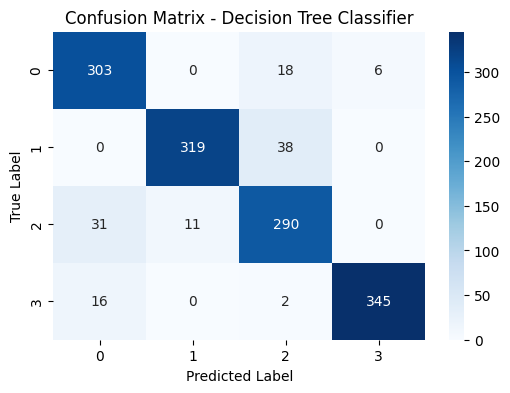

In [14]:
# Konversi nilai Global_Sales menjadi kategori
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df['Global_Label'] = pd.qcut(df['Global_Sales'], q=4, labels=['Low','Medium','High','Very_High'])

# Pilih fitur numerik
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = df[features]
y = df['Global_Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)

print("\n=== Confusion Matrix ===")
print(cm)

# === PLOT ===
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Association Rule Mining (Apriori)

In [ ]:
#TAHAP 9: Association Rule Mining
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 5000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.expand_frame_repr', False)

# 1. Load dataset
df = pd.read_csv("Video_Games_Sales.csv")

# 2. Pilih kolom kategorikal
df_ap = df[['Genre','Platform','Rating']].copy()

# 3. Tambahkan prefix agar aman
df_ap['Genre']    = 'Genre_' + df_ap['Genre'].astype(str)
df_ap['Platform'] = 'Platform_' + df_ap['Platform'].astype(str)
df_ap['Rating']   = 'Rating_' + df_ap['Rating'].astype(str)

# 4. One-hot encoding
df_basket = pd.get_dummies(df_ap)

# 5. Jalankan Apriori
frequent_items = apriori(df_basket,
                         min_support=0.03,
                         use_colnames=True)

# 6. Mining rules
rules = association_rules(frequent_items,
                          metric="lift",
                          min_threshold=1.0)

# 7. Sort dan tampilkan rapi sperti contoh
rules = rules.sort_values(by='lift', ascending=False).reset_index(drop=True)

rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Genre_Genre_8),(Rating_Rating_5),0.079132,0.093486,0.033794,0.427060,4.568145,1.0,0.026396,1.582213,0.848213,0.243430,0.367974,0.394272
1,(Rating_Rating_5),(Genre_Genre_8),0.093486,0.079132,0.033794,0.361484,4.568145,1.0,0.026396,1.442202,0.861645,0.243430,0.306616,0.394272
2,(Rating_Rating_1),(Genre_Genre_10),0.238710,0.140439,0.071057,0.297670,2.119566,1.0,0.037533,1.223870,0.693830,0.230635,0.182920,0.401816
3,(Genre_Genre_10),(Rating_Rating_1),0.140439,0.238710,0.071057,0.505963,2.119566,1.0,0.037533,1.540955,0.614506,0.230635,0.351052,0.401816
4,(Platform_Platform_15),(Rating_Rating_8),0.071595,0.404869,0.059154,0.826232,2.040741,1.0,0.030168,3.424866,0.549310,0.141751,0.708018,0.486170
5,(Rating_Rating_8),(Platform_Platform_15),0.404869,0.071595,0.059154,0.146107,2.040741,1.0,0.030168,1.087262,0.856923,0.141751,0.080258,0.486170
6,(Genre_Genre_6),(Rating_Rating_1),0.074705,0.238710,0.034990,0.468375,1.962104,1.0,0.017157,1.432004,0.529932,0.125671,0.301678,0.307477
7,(Rating_Rating_1),(Genre_Genre_6),0.238710,0.074705,0.034990,0.146580,1.962104,1.0,0.017157,1.084219,0.644095,0.125671,0.077677,0.307477
8,(Genre_Genre_0),(Rating_Rating_5),0.201567,0.093486,0.036366,0.180415,1.929856,1.0,0.017522,1.106065,0.603466,0.140578,0.095894,0.284705
9,(Rating_Rating_5),(Genre_Genre_0),0.093486,0.201567,0.036366,0.388996,1.929856,1.0,0.017522,1.306755,0.531516,0.140578,0.234745,0.284705


In [32]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Load dataset
df = pd.read_csv("Video_Games_Sales.csv")

# 2. Pilih kolom kategorikal
df_ap = df[['Genre','Platform','Rating']].copy()

# 3. Prefix keamanan
df_ap['Genre'] = 'Genre_' + df_ap['Genre'].astype(str)
df_ap['Platform'] = 'Platform_' + df_ap['Platform'].astype(str)
df_ap['Rating'] = 'Rating_' + df_ap['Rating'].astype(str)

# 4. One-hot encoding
basket = pd.get_dummies(df_ap)

# 5. Jalankan apriori
frequent_items = apriori(basket, 
                         min_support=0.03, 
                         use_colnames=True)

# 6. Mining association rules
rules = association_rules(frequent_items,
                          metric='lift',
                          min_threshold=1.0)

# 7. SORT Tinggi ke rendah (sama seperti contoh)
rules = rules.sort_values(by='lift', ascending=False).reset_index(drop=True)

# 8. Tampilkan tabel dataframe
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Genre_Genre_8),(Rating_Rating_5),0.079132,0.093486,0.033794,0.427060,4.568145,1.0,0.026396,1.582213,0.848213,0.243430,0.367974,0.394272
1,(Rating_Rating_5),(Genre_Genre_8),0.093486,0.079132,0.033794,0.361484,4.568145,1.0,0.026396,1.442202,0.861645,0.243430,0.306616,0.394272
2,(Rating_Rating_1),(Genre_Genre_10),0.238710,0.140439,0.071057,0.297670,2.119566,1.0,0.037533,1.223870,0.693830,0.230635,0.182920,0.401816
3,(Genre_Genre_10),(Rating_Rating_1),0.140439,0.238710,0.071057,0.505963,2.119566,1.0,0.037533,1.540955,0.614506,0.230635,0.351052,0.401816
4,(Platform_Platform_15),(Rating_Rating_8),0.071595,0.404869,0.059154,0.826232,2.040741,1.0,0.030168,3.424866,0.549310,0.141751,0.708018,0.486170
5,(Rating_Rating_8),(Platform_Platform_15),0.404869,0.071595,0.059154,0.146107,2.040741,1.0,0.030168,1.087262,0.856923,0.141751,0.080258,0.486170
6,(Genre_Genre_6),(Rating_Rating_1),0.074705,0.238710,0.034990,0.468375,1.962104,1.0,0.017157,1.432004,0.529932,0.125671,0.301678,0.307477
7,(Rating_Rating_1),(Genre_Genre_6),0.238710,0.074705,0.034990,0.146580,1.962104,1.0,0.017157,1.084219,0.644095,0.125671,0.077677,0.307477
8,(Genre_Genre_0),(Rating_Rating_5),0.201567,0.093486,0.036366,0.180415,1.929856,1.0,0.017522,1.106065,0.603466,0.140578,0.095894,0.284705
9,(Rating_Rating_5),(Genre_Genre_0),0.093486,0.201567,0.036366,0.388996,1.929856,1.0,0.017522,1.306755,0.531516,0.140578,0.234745,0.284705


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Load dataset
df = pd.read_csv('Video_Games_Sales.csv')

# 2. Membuat dataframe baru
df_basket = pd.DataFrame()

# --- Binning Sales ke kategori ---
df_basket['Global_bin'] = pd.cut(df['Global_Sales'],
                                bins=[0, 1, 5, 50],
                                labels=['Low','Medium','High'])

df_basket['NA_bin'] = pd.cut(df['NA_Sales'],
                             bins=[0, 1, 5, 50],
                             labels=['Low','Medium','High'])

df_basket['EU_bin'] = pd.cut(df['EU_Sales'],
                             bins=[0, 1, 5, 50],
                             labels=['Low','Medium','High'])

df_basket['JP_bin'] = pd.cut(df['JP_Sales'],
                             bins=[0, 1, 5, 50],
                             labels=['Low','Medium','High'])

# 3. One hot encoding
df_hot = pd.get_dummies(df_basket)

# 4. Apriori
frequent_items = apriori(df_hot, min_support=0.05, use_colnames=True)

# 5. Association rules
rules = association_rules(frequent_items, metric='lift', min_threshold=1.0)

# 6. Tampilkan hasil 
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(NA_bin_Low),(Global_bin_Low),0.178480,0.176027,0.127221,0.712802,4.049382,1.0,0.095803,2.869002,0.916652,0.559737,0.651447,0.717767
1,(Global_bin_Low),(NA_bin_Low),0.176027,0.178480,0.127221,0.722732,4.049382,1.0,0.095803,2.962910,0.913924,0.559737,0.662494,0.717767
2,(EU_bin_Low),(Global_bin_Low),0.159699,0.176027,0.109157,0.683521,3.883038,1.0,0.081046,2.603559,0.883575,0.481785,0.615910,0.651818
3,(Global_bin_Low),(EU_bin_Low),0.176027,0.159699,0.109157,0.620116,3.883038,1.0,0.081046,2.211992,0.901085,0.481785,0.547919,0.651818
4,(NA_bin_Low),(EU_bin_Low),0.178480,0.159699,0.091094,0.510389,3.195951,1.0,0.062591,1.716263,0.836381,0.368676,0.417339,0.540400
5,(EU_bin_Low),(NA_bin_Low),0.159699,0.178480,0.091094,0.570412,3.195951,1.0,0.062591,1.912345,0.817688,0.368676,0.477082,0.540400
6,"(NA_bin_Low, EU_bin_Low)",(Global_bin_Low),0.091094,0.176027,0.087206,0.957321,5.438482,1.0,0.071171,19.306315,0.897920,0.484707,0.948203,0.726367
7,"(NA_bin_Low, Global_bin_Low)",(EU_bin_Low),0.127221,0.159699,0.087206,0.685472,4.292290,1.0,0.066889,2.671631,0.878829,0.436658,0.625697,0.615770
8,"(EU_bin_Low, Global_bin_Low)",(NA_bin_Low),0.109157,0.178480,0.087206,0.798904,4.476165,1.0,0.067724,4.085217,0.871753,0.435094,0.755215,0.643755
9,(NA_bin_Low),"(EU_bin_Low, Global_bin_Low)",0.178480,0.109157,0.087206,0.488606,4.476165,1.0,0.067724,1.741989,0.945314,0.435094,0.425943,0.643755


In [ ]:
| Model     | Tipe Data                          |
| --------- | ---------------------------------- |
| Apriori 1 | Kategori deskriptif                |
| Apriori 2 | Kategori deskriptif yang di-refine |
| Apriori 3 | Penjualan numeric yang dibinning   |